In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/코딩스터디1/train.csv")
test = pd.read_csv("/content/drive/MyDrive/코딩스터디1/test.csv")

## **EDA**

### 자료구조확인

PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name 변수가 범주형 변수, 나머지 변수들은 수치형 변수라고 생각했다. 

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 변수들은 모두 탑승자들이 Spaceship Titanic에서 사용한 금액을 나타내는 변수이므로 수치형이라 생각했다. HomePlanet와 Destination는 각각 출발지와 도착지를 나타내는 변수로 3가지의 범주를 가지고있고, CryoSleep 변수는 탑승자의 이동성 여부를 나타내는 것이기 때문에 볌주형이라 판단했다. Cabin 변수는 탑승자가 머무르는 선실을 의미하는 것이기 때문에 범주형이라고 판단했고, PassengerId 변수는 각 탑승객을 구분하기 위한 것이므로 수치형이라 판단하기는 어려워 범주형이라 판단하였다. VIP 변수는 VIP의 여부를 나타내는 것이기 때문에 범주형이라 판단하였다. Name 변수는 각 탑승자의 이름이므로 범주형이라 판단했다.

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.shape

(8693, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test.shape

(4277, 13)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### 결측치확인

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

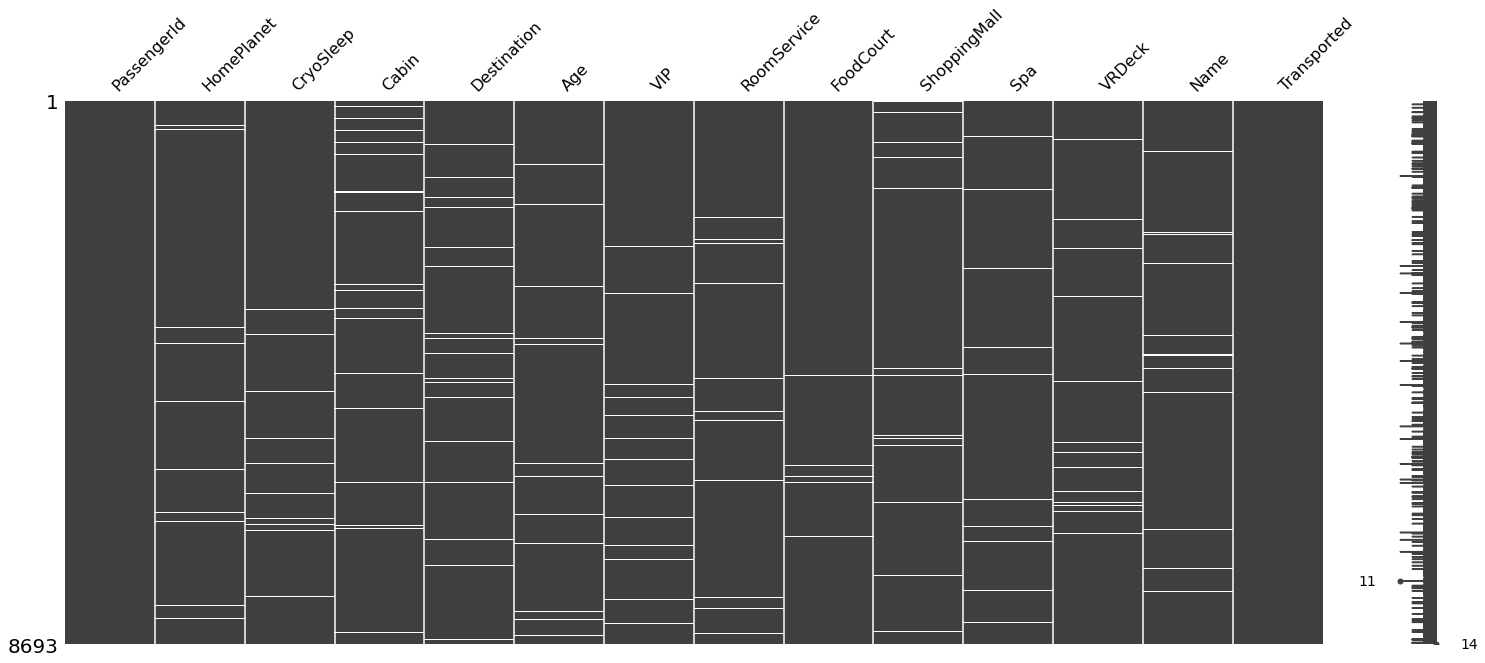

In [ ]:
msno.matrix(train)

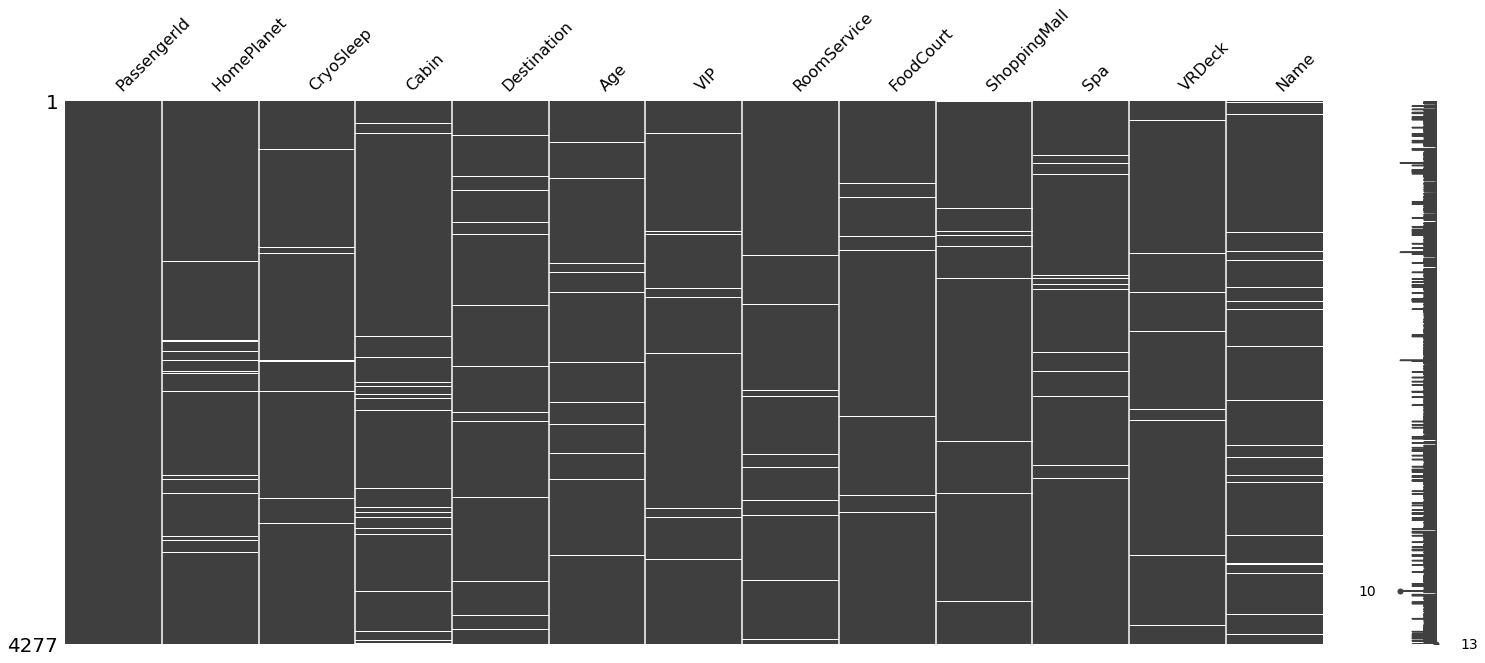

In [ ]:
msno.matrix(test)

### 파생변수 생성

In [ ]:
train['Group'] = train['PassengerId'].apply(lambda x : x.split("_")[0])
train['Number'] = train['PassengerId'].apply(lambda x : x.split("_")[1])

test['Group'] = test['PassengerId'].apply(lambda x : x.split("_")[0])
test['Number'] = test['PassengerId'].apply(lambda x : x.split("_")[1])

train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [ ]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Number
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01


In [ ]:
train['Cabin'] = train['Cabin'].fillna("NA/NA/NA")
test['Cabin'] = test['Cabin'].fillna("NA/NA/NA")

In [ ]:
train['Cabin'].isnull().sum()

0

In [ ]:
test['Cabin'].isnull().sum()

0

In [ ]:
train['deck'] = train.Cabin.str.split('/').str[0]
train['num'] = train.Cabin.str.split('/').str[1].apply(lambda x : -1 if x=='NA' else x)
train['side'] = train.Cabin.str.split('/').str[2].apply(lambda x : True if x=='S' else False)

In [ ]:
train=train.drop("Cabin", axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,True
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,True
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,True


In [ ]:
test['deck'] = test.Cabin.str.split('/').str[0]
test['num'] = test.Cabin.str.split('/').str[1].apply(lambda x : -1 if x=='NA' else x)
test['side'] = test.Cabin.str.split('/').str[2].apply(lambda x : True if x=='S' else False)

test=test.drop("Cabin", axis=1)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Number,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3,True
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4,True
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0,True
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,C,1,True
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,F,5,True


In [ ]:
train.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Group            object
Number           object
deck             object
num              object
side               bool
dtype: object

### 범주형 시각화

In [ ]:
df = train.copy()
cat_col=["HomePlanet", "CryoSleep", "Destination", "VIP", "Group", "deck", "side", "Transported"]
df=df.fillna("NA")

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,True
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,True
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,True


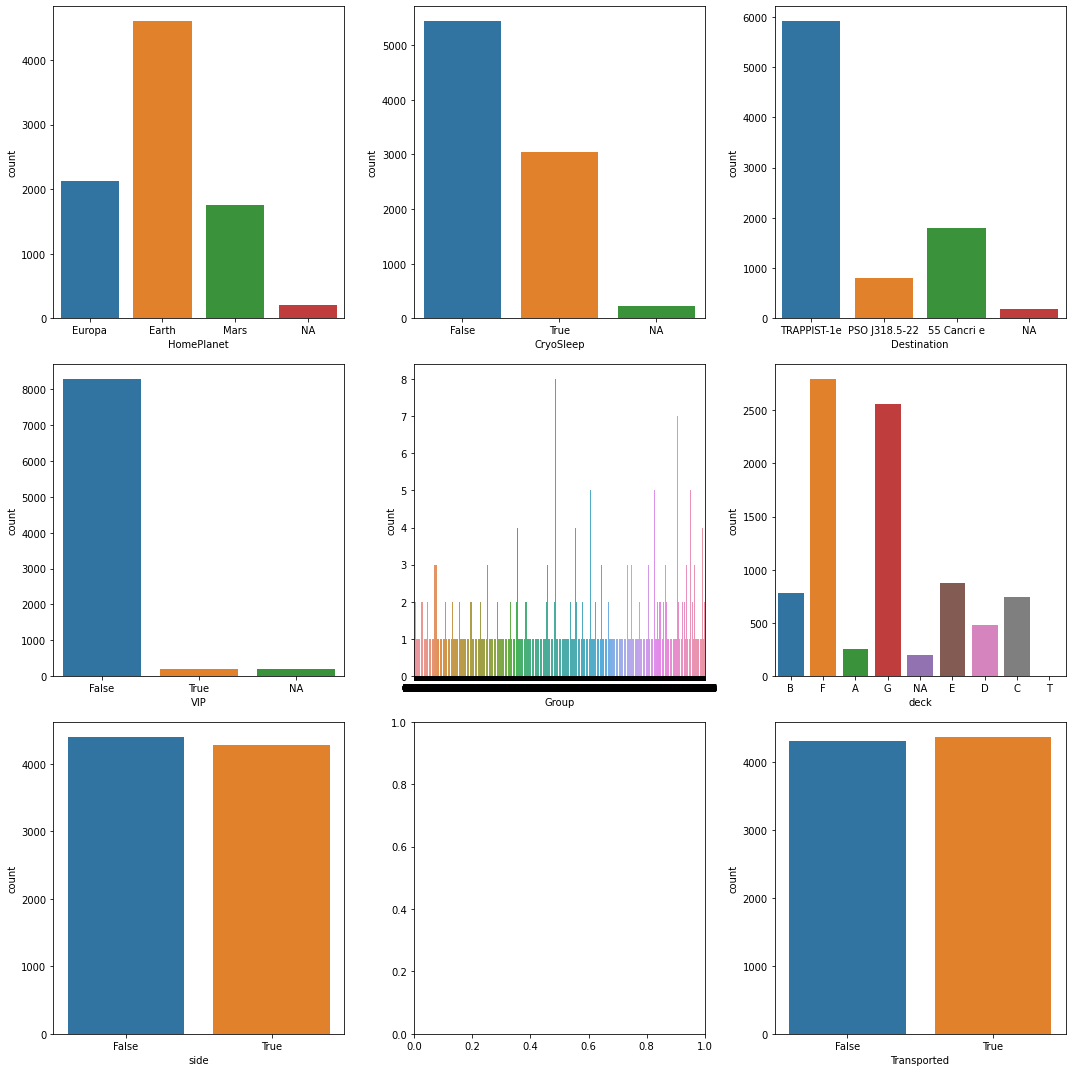

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
sns.countplot(data=df, x=cat_col[0], ax=axes[0,0])
sns.countplot(data=df, x=cat_col[1], ax=axes[0,1])
sns.countplot(data=df, x=cat_col[2], ax=axes[0,2])
sns.countplot(data=df, x=cat_col[3], ax=axes[1,0])
sns.countplot(data=df, x=cat_col[4], ax=axes[1,1])
sns.countplot(data=df, x=cat_col[5], ax=axes[1,2])
sns.countplot(data=df, x=cat_col[6], ax=axes[2,0])
sns.countplot(data=df, x=cat_col[7], ax=axes[2,2])

plt.tight_layout()
plt.show()

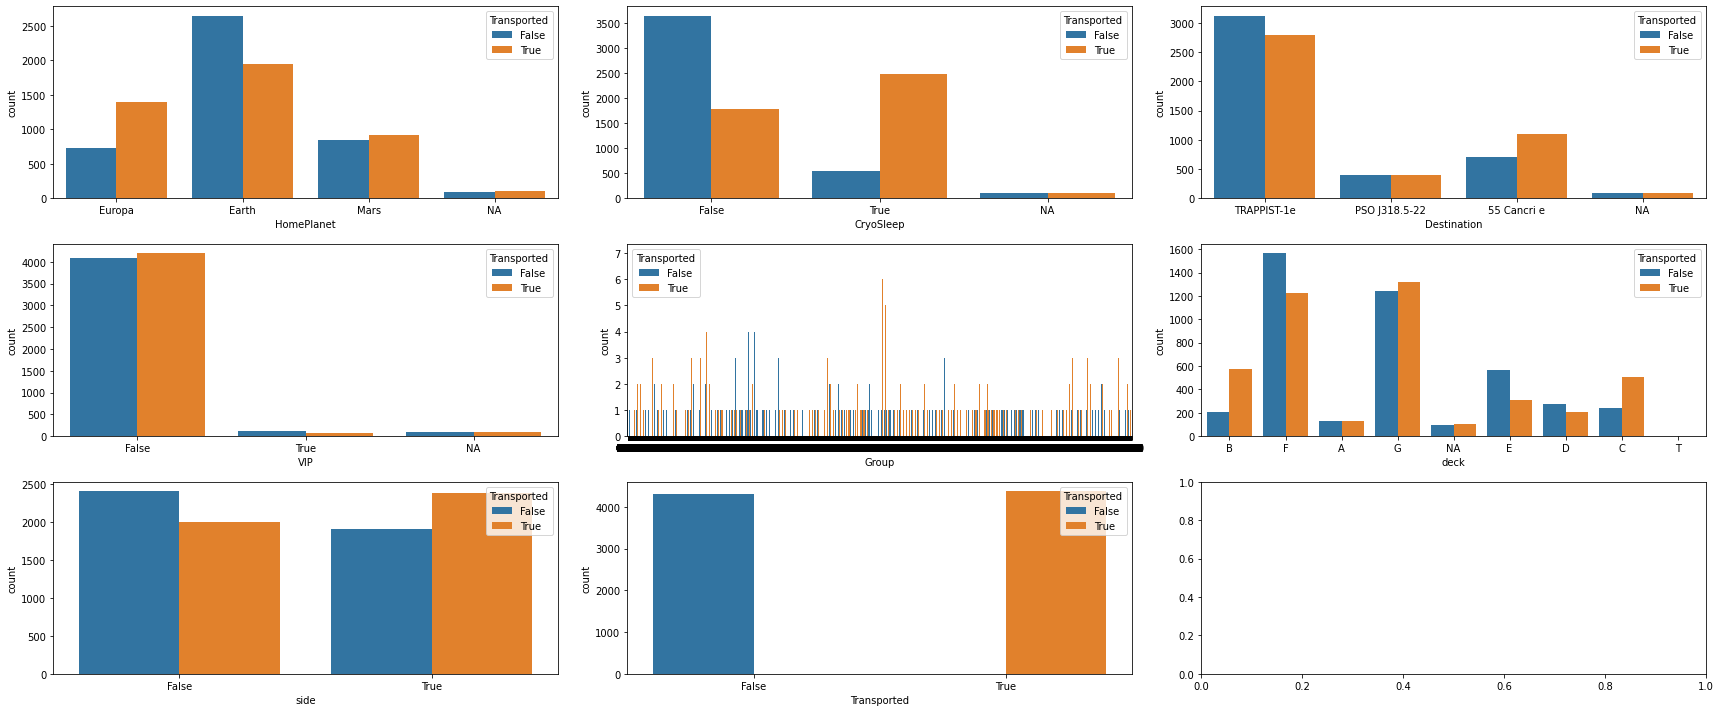

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(24,10))
sns.countplot(data=df, x=cat_col[0], hue="Transported", ax=axes[0,0])
sns.countplot(data=df, x=cat_col[1], hue="Transported", ax=axes[0,1])
sns.countplot(data=df, x=cat_col[2], hue="Transported", ax=axes[0,2])
sns.countplot(data=df, x=cat_col[3], hue="Transported", ax=axes[1,0])
sns.countplot(data=df, x=cat_col[4], hue="Transported", ax=axes[1,1])
sns.countplot(data=df, x=cat_col[5], hue="Transported", ax=axes[1,2])
sns.countplot(data=df, x=cat_col[6], hue="Transported", ax=axes[2,0])
sns.countplot(data=df, x=cat_col[7], hue="Transported", ax=axes[2,1])

plt.tight_layout()
plt.show()

HomePlanet 중 Earth가 대다수를 차지한다. 하지만 다른 두 행성과는 달리 지구는 transport에 성공하지 못한 승객이 더 많다.

선실에 갇혀있는 승객보다 그렇지 않은 승객이 더 많다. 하지만 CryoSleep이 True인 승객은 transport에 성공한 경우가 더 많은 반면, False인 승객들은 성공하지 못한 경우가 더 많다.

TRAPPIST-1e가 목적지인 승객이 가장 많다. 또 TRAPPIST-1e를 목적지로 하는 승객의 transport를 실패하는 경우가 더 많다.

VIP가 아닌 승객이 압도적으로 많다.

결측치는 HomePlanet, CryoSleep, Destination, VIP, deck 변수에만 있다.




### 수치형 시각화

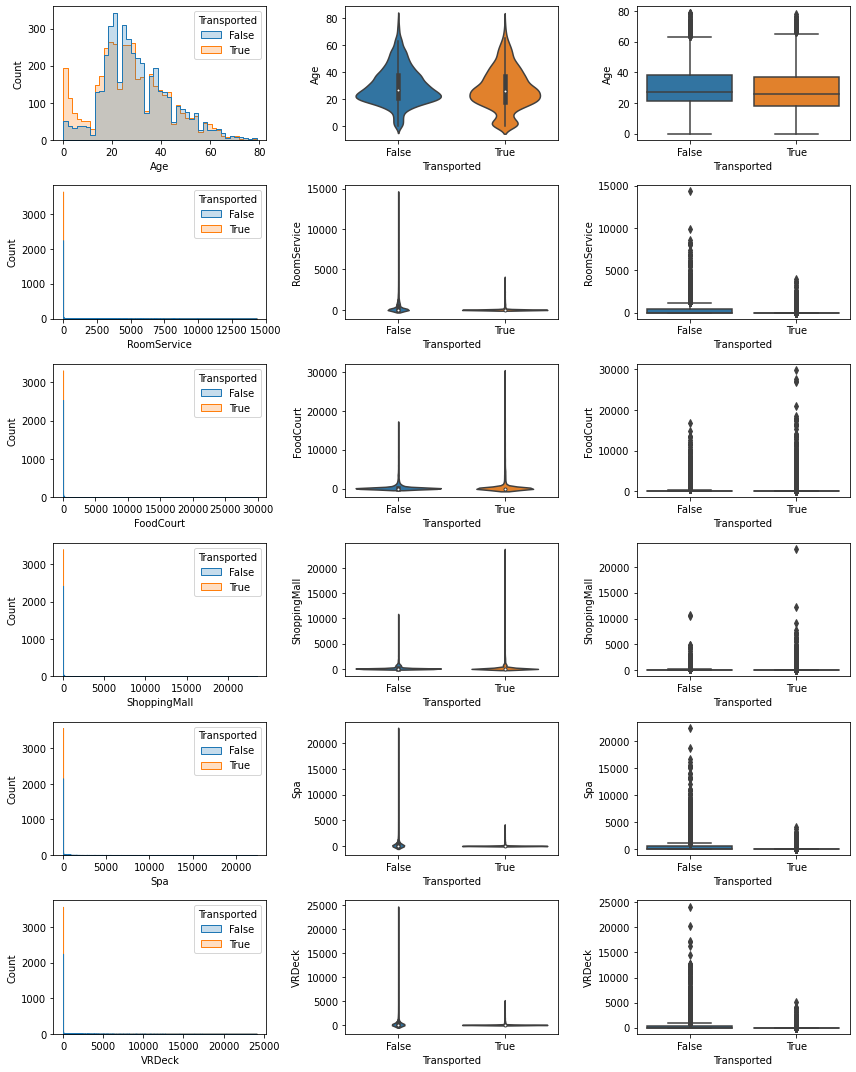

In [ ]:
fig, axes = plt.subplots(6,3,figsize=(12,15))
num_col=["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for i in range(6):
  sns.histplot(data=train, x=num_col[i], hue="Transported", element="step", ax=axes[i,0])
  sns.violinplot(data=train, y=num_col[i], x="Transported", ax=axes[i,1])
  sns.boxplot(data=train, y=num_col[i], x="Transported", ax=axes[i,2])

plt.tight_layout()
plt.show()

대부분의 수치형 변수들의 값이 0을 가지고 있음을 확인하였다. 이는 범주형 변수 중 하나인 VIP 변수의 값이 True인 경우가 희박하기 때문이라고 생각된다. 

나이의 경우 10대 후반부터 30대 중반 정도까지의 승객이 많았으며 그 중 20대의 비중이 가장 컸다. 또 60대 이상의 승객은 거의 없어 이를 이상치라 여길 수 있다고 생각하였다.

### 결측치 보간

**수치형 자료 결측치 보간**


*   Age


> 20대와 30대에 가장 많은 값들이 몰려있고, violinplot과 boxplot을 확인해보면 60대와 80대를 이상치로 여길 수 있음을 확인할 수 있다. 따라서 중앙값으로 대체하는 것이 가장 적절하다


*   Age이외의 자료들


> 대부분의 값들이 0의 값을 가지므로 결측치를 최반값이자 중앙값인 0으로 대체하는 것이 가장 적절하다.










In [ ]:
num_col1=["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for i in range(len(num_col1)):
  col = num_col1[i]
  train[col] = train[col].fillna(train[col].median())

for i in range(len(num_col1)):
  col = num_col1[i]
  test[col] = test[col].fillna(test[col].median())

train['Age']=train['Age'].fillna(train['Age'].median())
test['Age']=test['Age'].fillna(test['Age'].median())

In [ ]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Group             0
Number            0
deck              0
num               0
side              0
dtype: int64

In [ ]:
test.isnull().sum()

HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Group            0
Number           0
deck             0
num              0
side             0
dtype: int64

**범주형 자료 결측치 보간**

> 최빈값으로 대체하거나 다른 변수들과의 관계를 확인한 후 대체해야한다. 그러나 결측치들이 큰 상관관계를 가지지 않으므로 전부 최빈값으로 대체해주었다.












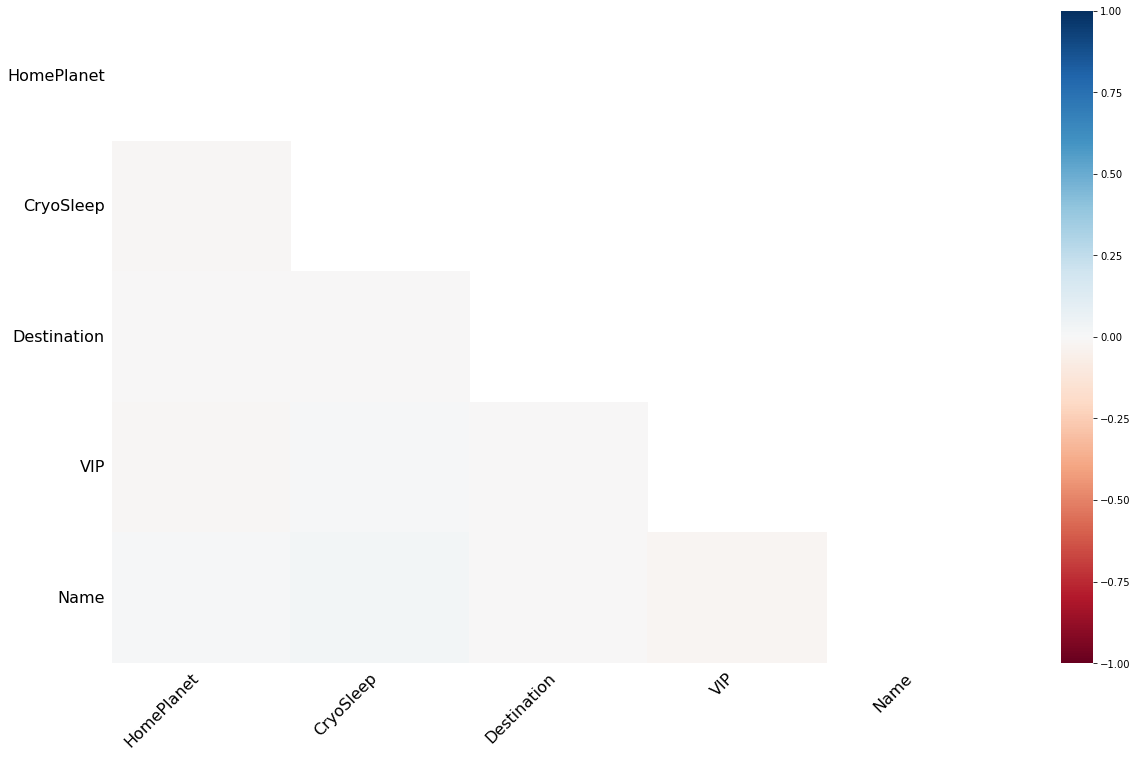

In [ ]:
msno.heatmap(train)

In [ ]:
train['HomePlanet']=train['HomePlanet'].fillna("Earth")
train['CryoSleep']=train['CryoSleep'].fillna(False)
train['Destination']=train['Destination'].fillna("TRAPPIST-1e")
train['VIP']=train['VIP'].fillna(False)

In [ ]:
test['HomePlanet']=test['HomePlanet'].fillna("Earth")
test['CryoSleep']=test['CryoSleep'].fillna(False)
test['Destination']=test['Destination'].fillna("TRAPPIST-1e")
test['VIP']=test['VIP'].fillna(False)

In [ ]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Group             0
Number            0
deck              0
num               0
side              0
dtype: int64

In [ ]:
test.isnull().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Group            0
Number           0
deck             0
num              0
side             0
dtype: int64

In [ ]:
train=train.drop("Name", axis=1)
test=test.drop("Name", axis=1)
#이름은 결측치 보간이 어렵고 예측에 유의미한 영향을 주는 feature가 아니므로 제거

In [ ]:
train.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Group            object
Number           object
deck             object
num              object
side               bool
dtype: object

In [ ]:
train.to_csv('/content/drive/MyDrive/코딩스터디1/processed_train.csv', index=False)
test.to_csv('/content/drive/MyDrive/코딩스터디1/processed_test.csv', index=False)

## **Modeling**

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

np.random.seed(104)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#EDA 코드 실행 없이 바로 전처리 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/코딩스터디1/processed_train.csv")
test = pd.read_csv("/content/drive/MyDrive/코딩스터디1/processed_test.csv")

In [ ]:
X = train.drop("Transported", axis=1)
y = train['Transported']

In [ ]:
cv = KFold(n_splits=5, random_state=104, shuffle=True)

### random forest

In [ ]:
x_dumm1 = pd.get_dummies(X)
x_dumm2 = pd.get_dummies(X.drop(['num'], axis=1))
x_dumm3 = pd.get_dummies(X.drop(['Group'], axis=1))
x_dumm4 = pd.get_dummies(X.drop(['Group', 'num'], axis=1))

dummies = [x_dumm1, x_dumm2, x_dumm3, x_dumm4]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

accavg = []
accall = []

for data in dummies:
  accuracy_history = []

  for train_idx, test_idx in cv.split(data):
      X_train, X_test = data.iloc[train_idx, :], data.iloc[test_idx, :]
      y_train, y_test = y[train_idx], y[test_idx]

      model = RandomForestClassifier(n_estimators=5, random_state=0)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      accuracy_history.append(accuracy_score(y_pred, y_test))

  accavg.append(np.mean(accuracy_history))
  accall.append(accuracy_history)

print('각 데이터 별 평균 정확도: ', accavg)

각 데이터 별 평균 정확도:  [0.7565868907371736, 0.7619922299696067, 0.7618774198628764, 0.7668227245927219]


In [ ]:
accall

[[0.7492811960897068,
  0.750431282346176,
  0.7602070155261644,
  0.7554660529344074,
  0.7675489067894131],
 [0.7567567567567568,
  0.7682576193214491,
  0.7625071880391029,
  0.7577675489067894,
  0.7646720368239356],
 [0.7602070155261644,
  0.7596319723979299,
  0.765382403680276,
  0.7508630609896433,
  0.7733026467203682],
 [0.7694077055779184,
  0.7682576193214491,
  0.772857964347326,
  0.7652474108170311,
  0.7583429228998849]]

### logistic regression

In [ ]:
scaledX = X.copy()

In [ ]:
#수치형 feature만 표준화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledX['Age'] = scaler.fit_transform(X['Age'].to_frame())
scaledX['RoomService'] = scaler.fit_transform(X['RoomService'].to_frame())
scaledX['FoodCourt'] = scaler.fit_transform(X['FoodCourt'].to_frame())
scaledX['ShoppingMall'] = scaler.fit_transform(X['ShoppingMall'].to_frame())
scaledX['Spa'] = scaler.fit_transform(X['Spa'].to_frame())
scaledX['VRDeck'] = scaler.fit_transform(X['VRDeck'].to_frame())

scaledX

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,deck,num,side
0,Europa,False,TRAPPIST-1e,0.711945,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1,1,B,0,False
1,Earth,False,TRAPPIST-1e,-0.334037,False,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,2,1,F,0,True
2,Europa,False,TRAPPIST-1e,2.036857,True,-0.268001,1.959998,-0.283579,5.695623,-0.219796,3,1,A,0,True
3,Europa,False,TRAPPIST-1e,0.293552,False,-0.333105,0.523010,0.336851,2.687176,-0.092818,3,2,A,0,True
4,Earth,False,TRAPPIST-1e,-0.891895,False,0.125652,-0.237159,-0.031059,0.231374,-0.261240,4,1,F,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,0.851410,True,-0.333105,3.992336,-0.283579,1.189173,-0.197751,9276,1,A,98,False
8689,Earth,True,PSO J318.5-22,-0.752431,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,9278,1,G,1499,True
8690,Earth,False,TRAPPIST-1e,-0.194573,False,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,9279,1,G,1500,True
8691,Europa,False,55 Cancri e,0.223820,False,-0.333105,0.376365,-0.283579,0.043013,2.589576,9280,1,E,608,True


In [ ]:
sc_x_dumm1 = pd.get_dummies(scaledX)
sc_x_dumm2 = pd.get_dummies(scaledX.drop(['num'], axis=1))
sc_x_dumm3 = pd.get_dummies(scaledX.drop(['Group'], axis=1))
sc_x_dumm4 = pd.get_dummies(scaledX.drop(['Group', 'num'], axis=1))

sc_dummies = [sc_x_dumm1, sc_x_dumm2, sc_x_dumm3, sc_x_dumm4]

In [ ]:
from sklearn.linear_model import LogisticRegression

accavg = []
accall = []

for data in sc_dummies:
  accuracy_history = []

  for train_idx, test_idx in cv.split(data):
      X_train, X_test = data.iloc[train_idx, :], data.iloc[test_idx, :]
      y_train, y_test = y[train_idx], y[test_idx]

      model = LogisticRegression()
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      accuracy_history.append(accuracy_score(y_pred, y_test))

  accavg.append(np.mean(accuracy_history))
  accall.append(accuracy_history)

print('각 데이터 별 평균 정확도: ', accavg)

각 데이터 별 평균 정확도:  [0.7867267605484679, 0.7861513865553726, 0.7900622753841174, 0.7898317949220186]


In [ ]:
accall

[[0.7872340425531915,
  0.7763082231167338,
  0.7809085681426107,
  0.7888377445339471,
  0.8003452243958573],
 [0.7901092581943646,
  0.7763082231167338,
  0.7780333525014376,
  0.7871116225546605,
  0.7991944764096662],
 [0.7918343875790684,
  0.7814836112708453,
  0.7855089131684876,
  0.7882623705408516,
  0.8032220943613348],
 [0.7935595169637722,
  0.7814836112708453,
  0.7866589994249569,
  0.7876869965477561,
  0.7997698504027618]]

하이퍼파라미터 튜닝 전에는 Random Forest보다 Logistic Regression의 성능이 더 좋은 것으로 확인되었다.

### 하이퍼파라미터 튜닝

**Random Forest** 

: 독립적으로 구성된 여러 개의 트리를 사용하여 모델의 분산을 줄이고 예측력을 향상시킴

*   n_estimators: 예측에 사용할 트리의 개수
*   criterion: 분류 성능 지표
*   max_depth: 트리의 최대 깊이 (너무 깊으면 과적합 위험)
*   min_samples_split: 분할에 필요한 최소한의 데이터 개수 (너무 작으면 과적합 위험)




**Logistic Regression**

: 범주형 feature도 고려 가능한 이진 분류 모델, 데이터에 표준화 적용 필요함

*   penalty: 패널티텀 설정
*   C: regularization 강도 결정 (작을수록 높은 강도의 정규화)
*   random_state: shuffle=True 일 경우에 사용되는 seed 설정



 #### 랜덤포레스트에 대한 그리드 서치 진행

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#범주형 인코딩
#'HomePlanet', 'Destination', 'deck' 변수에 대해서 one-hot encoding을, 'Group'변수에 대해서는 라벨링을 진행했다.
#number와 num변수는 예측에 유의미하지 않다고 판단해 제거하였다.
from sklearn.preprocessing import LabelEncoder

train = train.drop(["Number", "num"], axis=1)
test = test.drop(["Number", "num"], axis=1)

X = train.drop("Transported", axis=1)
y = train['Transported']

X = pd.get_dummies(X)

#le = LabelEncoder()
#le.fit(X['Group'])
#X['Group'] = le.transform(X['Group'])

#X = pd.get_dummies(X, ['HomePlanet', 'Destination', 'deck'], drop_first = True)

In [ ]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,side,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,False,...,0,1,0,1,0,0,0,0,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,2,True,...,0,1,0,0,0,0,0,1,0,0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,3,True,...,0,1,1,0,0,0,0,0,0,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,3,True,...,0,1,1,0,0,0,0,0,0,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,4,True,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, stratify=y, random_state=999)

In [ ]:
estimator = RandomForestClassifier()

param_grid = {'n_estimators':[100,150,200],
              'max_depth':[4,8,12],
              'min_samples_split':[100,200,300]}

grid = GridSearchCV(estimator, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [100, 150, 200]})

In [ ]:
df = pd.DataFrame(grid.cv_results_)
print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.501617      0.077311         0.056656        0.036377   
1        0.503804      0.015081         0.036380        0.000722   
2        0.658378      0.005860         0.049489        0.002893   
3        0.328758      0.003989         0.027129        0.001802   
4        0.489140      0.011604         0.038058        0.003891   
5        0.810122      0.168698         0.065673        0.012425   
6        0.459697      0.074926         0.034320        0.006319   
7        0.501524      0.004776         0.040836        0.005178   
8        0.652919      0.016829         0.048298        0.001898   
9        0.427178      0.003458         0.031778        0.001321   
10       0.636417      0.006469         0.046680        0.003408   
11       0.864265      0.006617         0.058409        0.001905   
12       0.409074      0.003811         0.030067        0.001022   
13       0.597045      0.004530         0.048456

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8014094719910627
{'max_depth': 12, 'min_samples_split': 100, 'n_estimators': 150}


In [ ]:
rf_model = grid.best_estimator_
#validation set에 대한 score
rf_model.score(X_validation, y_validation)

0.7883841288096607

#### 로지스틱회귀에 대한 랜덤 서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

In [ ]:
sc_x_dumm = pd.get_dummies(scaledX.drop(['Number', 'num'], axis=1))
sc_x_dumm

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,side,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,False,0.711945,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,1,False,...,0,1,0,1,0,0,0,0,0,0
1,False,-0.334037,False,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,2,True,...,0,1,0,0,0,0,0,1,0,0
2,False,2.036857,True,-0.268001,1.959998,-0.283579,5.695623,-0.219796,3,True,...,0,1,1,0,0,0,0,0,0,0
3,False,0.293552,False,-0.333105,0.523010,0.336851,2.687176,-0.092818,3,True,...,0,1,1,0,0,0,0,0,0,0
4,False,-0.891895,False,0.125652,-0.237159,-0.031059,0.231374,-0.261240,4,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,0.851410,True,-0.333105,3.992336,-0.283579,1.189173,-0.197751,9276,False,...,0,0,1,0,0,0,0,0,0,0
8689,True,-0.752431,False,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,9278,True,...,1,0,0,0,0,0,0,0,1,0
8690,False,-0.194573,False,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,9279,True,...,0,1,0,0,0,0,0,0,1,0
8691,False,0.223820,False,-0.333105,0.376365,-0.283579,0.043013,2.589576,9280,True,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(sc_x_dumm, y, train_size=0.8, stratify=y, random_state=999)

In [ ]:
lr = LogisticRegression(random_state=104)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'],
                     max_iter=[50, 100, 150, 200])

clf = RandomizedSearchCV(lr, distributions, random_state=0)

search = clf.fit(X_tr, y_tr)

In [ ]:
print(search.best_score_)
print(search.best_params_)

0.7903359210546732
{'C': 0.28414423279154777, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
lr_model = search.best_estimator_
#validation set에 대한 score
lr_model.score(X_val, y_val)

0.7682576193214491

### 테스트 데이터 예측

In [ ]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,deck,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,True
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,F,True
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,19,C,True
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,21,C,True
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,23,F,True


In [ ]:
# 랜덤포레스트 용 테스트 데이터 (표준화 X)
te_dumm = pd.get_dummies(test)
te_dumm

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,side,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,13,True,...,0,1,0,0,0,0,0,0,1,0
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,True,...,0,1,0,0,0,0,0,1,0,0
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,19,True,...,0,0,0,0,1,0,0,0,0,0
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,21,True,...,0,1,0,0,1,0,0,0,0,0
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,23,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0,9266,True,...,0,1,0,0,0,0,0,0,1,0
4273,False,42.0,False,0.0,847.0,17.0,10.0,144.0,9269,False,...,0,1,0,0,0,0,0,0,0,0
4274,True,26.0,False,0.0,0.0,0.0,0.0,0.0,9271,False,...,0,0,0,0,0,1,0,0,0,0
4275,False,26.0,False,0.0,2680.0,0.0,0.0,523.0,9273,False,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
scaledte = test.copy()

In [ ]:
#수치형 feature만 표준화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledte['Age'] = scaler.fit_transform(test['Age'].to_frame())
scaledte['RoomService'] = scaler.fit_transform(test['RoomService'].to_frame())
scaledte['FoodCourt'] = scaler.fit_transform(test['FoodCourt'].to_frame())
scaledte['ShoppingMall'] = scaler.fit_transform(test['ShoppingMall'].to_frame())
scaledte['Spa'] = scaler.fit_transform(test['Spa'].to_frame())
scaledte['VRDeck'] = scaler.fit_transform(test['VRDeck'].to_frame())

scaledte

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,deck,side
0,Earth,True,TRAPPIST-1e,-0.114147,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,13,G,True
1,Earth,False,TRAPPIST-1e,-0.684313,False,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,18,F,True
2,Europa,True,55 Cancri e,0.170937,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,19,C,True
3,Europa,False,TRAPPIST-1e,0.669832,False,-0.357339,4.121518,-0.312173,-0.104002,0.226648,21,C,True
4,Earth,False,TRAPPIST-1e,-0.613042,False,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,23,F,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,0.384749,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,9266,G,True
4273,Earth,False,TRAPPIST-1e,0.954916,False,-0.357339,0.277095,-0.281538,-0.258790,-0.130193,9269,NaN,False
4274,Mars,True,55 Cancri e,-0.185417,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,9271,D,False
4275,Europa,False,TRAPPIST-1e,-0.185417,False,-0.357339,1.491019,-0.312173,-0.267841,0.176479,9273,D,False


하이퍼파라미터 튜닝 결과, 두 모델 모두 튜닝 이전보다 성능이 향상되었으며,  튜닝 이전과는 반대로 Random Forest가 Logistic Regression보다 더 성능이 좋음을 확인하였다.

In [ ]:
# 로지스틱회귀 용 테스트 데이터 (표준화 O)
scte_dumm = pd.get_dummies(scaledte)
scte_dumm

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,side,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T
0,True,-0.114147,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,13,True,...,0,1,0,0,0,0,0,0,1,0
1,False,-0.684313,False,-0.357339,-0.277879,-0.312173,2.287504,-0.246712,18,True,...,0,1,0,0,0,0,0,1,0,0
2,True,0.170937,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,19,True,...,0,0,0,0,1,0,0,0,0,0
3,False,0.669832,False,-0.357339,4.121518,-0.312173,-0.104002,0.226648,21,True,...,0,1,0,0,1,0,0,0,0,0
4,False,-0.613042,False,-0.340723,-0.283840,0.832122,-0.267841,-0.246712,23,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,0.384749,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,9266,True,...,0,1,0,0,0,0,0,0,1,0
4273,False,0.954916,False,-0.357339,0.277095,-0.281538,-0.258790,-0.130193,9269,False,...,0,1,0,0,0,0,0,0,0,0
4274,True,-0.185417,False,-0.357339,-0.283840,-0.312173,-0.267841,-0.246712,9271,False,...,0,0,0,0,0,1,0,0,0,0
4275,False,-0.185417,False,-0.357339,1.491019,-0.312173,-0.267841,0.176479,9273,False,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# 랜덤포레스트 모델로 예측
rf_pred = rf_model.predict(te_dumm)
print(rf_pred)

[ True False  True ...  True  True  True]


In [ ]:
# 로지스틱회귀 모델로 예측
lr_pred = lr_model.predict(scte_dumm)
print(lr_pred)

[ True False  True ...  True  True  True]
